# 1 Mechine Learning Teknik algoritma KNN

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../../Data AI/Data Set/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name","Ticket","Age","Cabin"],inplace=True)

In [4]:
# X = input dan y = Target

X = df.drop(columns=["Survived"])
y = df["Survived"]

#split data                  
#stratify berguna untuk mengklasifikasikan berdasarkan label survive dan not survive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

## Prepocessor Menggunakan Pipe line Agar data tidak bocor / data leakage

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [6]:
numerical_pipeline = Pipeline([
    #nama steps 
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([ 
    ("imputer", SimpleImputer(strategy="most_frequent")),
    #encode
    ("onehot", OneHotEncoder())
])

In [9]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
693,3,male,0,0,56.4958,S
482,2,male,0,0,0.0000,S
528,1,male,0,0,221.7792,S
856,3,female,0,1,9.3500,S
802,2,female,1,1,26.2500,S


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 693 to 508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Embarked  710 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 38.9+ KB


In [7]:
#berguna untuk memfilter kolom mana yang masuk pipa numerik dan pipa kategori
from sklearn.compose import ColumnTransformer
preprocesor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["SibSp","Parch","Fare"]),
    ("categoric",categorical_pipeline,["Pclass","Sex","Embarked"])
])

### Pipeline

In [8]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo",KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch', 'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                           

In [9]:
pipeline.score(X_test, y_test)

0.776536312849162

# 2 Grid Search CV(Cross Validation) ---Final---

In [10]:
from sklearn.model_selection import GridSearchCV

#paremeter tuning
parameter = {
    #kenapa ada algo__ karna untuk memberi tahu n_neigborh punya nya pipeline KNeighborsClassifier()
    "algo__n_neighbors":range(1,51,2),
    "algo__weights":["uniform","distance"],
    "algo__p":[1,2]
}

#biasany crosvalidation 3-5
#n_jobs mw berapa banyak core cpu di pakai
model = GridSearchCV(pipeline, parameter,cv=3,n_jobs=-1,verbose =1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('impu

In [11]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
36,0.070240,0.050545,0.064377,0.036654,19,1,uniform,"{'algo__n_neighbors': 19, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.805907,0.813200,0.005344,1
28,0.046432,0.005141,0.060219,0.002757,15,1,uniform,"{'algo__n_neighbors': 15, 'algo__p': 1, 'algo_...",0.815126,0.810127,0.810127,0.811793,0.002357,2
40,0.047393,0.021994,0.069915,0.006721,21,1,uniform,"{'algo__n_neighbors': 21, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.801688,0.811793,0.007282,2
54,0.032177,0.009489,0.050484,0.022183,27,2,uniform,"{'algo__n_neighbors': 27, 'algo__p': 2, 'algo_...",0.815126,0.827004,0.793249,0.811793,0.013981,2
38,0.053236,0.002541,0.060323,0.005741,19,2,uniform,"{'algo__n_neighbors': 19, 'algo__p': 2, 'algo_...",0.815126,0.814346,0.805907,0.811793,0.004174,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.032148,0.006684,0.019180,0.003077,3,1,distance,"{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__...",0.760504,0.734177,0.759494,0.751392,0.012179,95
3,0.030062,0.009054,0.018264,0.004174,1,2,distance,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.768908,0.670886,0.734177,0.724657,0.040579,97
2,0.033399,0.010247,0.042039,0.010155,1,2,uniform,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.768908,0.670886,0.734177,0.724657,0.040579,97
1,0.045325,0.014245,0.035362,0.016435,1,1,distance,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",0.764706,0.670886,0.725738,0.720443,0.038484,99


In [12]:
model.best_params_

{'algo__n_neighbors': 19, 'algo__p': 1, 'algo__weights': 'uniform'}

In [13]:
#hasil akhir yang di peroleh
#tidak ada data lekage semua aman dengan menggunakan GridSearchCV
model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_

(0.8188202247191011, 0.7877094972067039, 0.8131995414199436)

# 2 Cek prediksi melalui model yang telah kita buat

In [14]:
X.iloc[:1]

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,male,1,0,7.25,S


In [15]:
data = [
    [1,"female",1,1,80,"S"],
    [3, "male",0,0,5,"S"],
    [1, "male",0,0,31,"S"]
]

X_predic = pd.DataFrame(data, index=["Rose", "Jack","Wak Yogi"], columns = X.columns)
X_predic

,Pclass,Sex,SibSp,Parch,Fare,Embarked
Rose,1,female,1,1,80,S
Jack,3,male,0,0,5,S
Wak Yogi,1,male,0,0,31,S


In [16]:
model.predict(X_predic)

array([1, 0, 1])

In [17]:
X_predic["Survived"] = model.predict(X_predic)
X_predic

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
Rose,1,female,1,1,80,S,1
Jack,3,male,0,0,5,S,0
Wak Yogi,1,male,0,0,31,S,1


# 3 EDA (Exploratory Data Analysis)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

In [19]:
df = pd.read_csv("data/titanic.csv")
df.drop(columns=["Name","Ticket","Cabin"],inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Target

In [41]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Numeric vs Target

Biasa nya digunakan visualisasi data histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

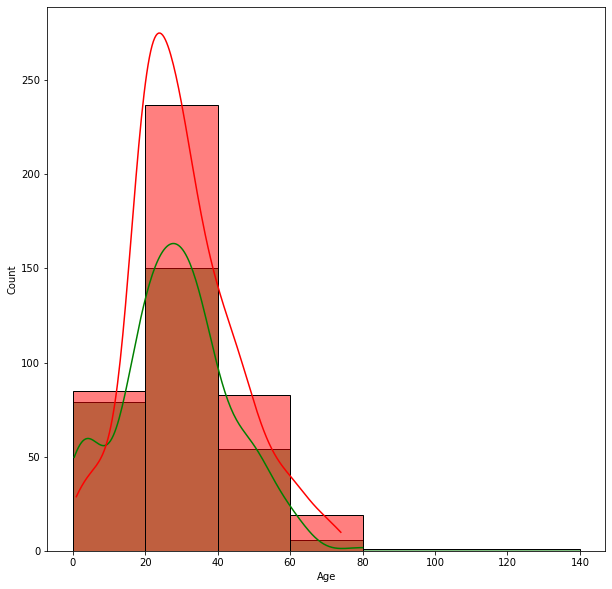

In [103]:
## umur vs target

plt.figure(figsize=[10,10])
sns.histplot(df["Age"][df["Survived"]==1],bins=[0,20,40,60,80,140], color="green", kde=True)
sns.histplot(df["Age"][df["Survived"]==0],bins=[0,20,40,60,80,140], color="red", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

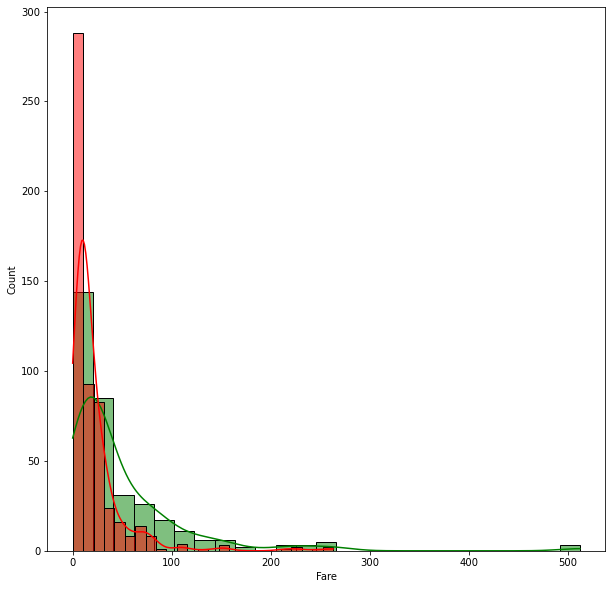

In [98]:
## harga vs target

plt.figure(figsize=[10,10])
sns.histplot(df.Fare[df["Survived"]==1],bins=25, color="green", kde=True)
sns.histplot(df.Fare[df["Survived"]==0],bins=25, color="red", kde=True)

### Categorical/Ordinal vs Target

Biasa nya digunakan visualisasi data Count

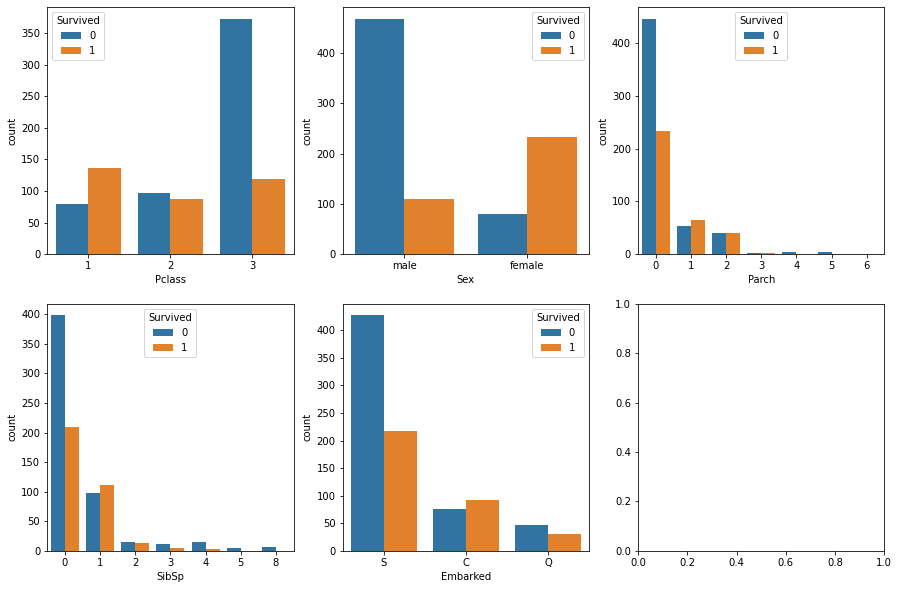

In [115]:
cat_var=["Pclass","Sex","Parch","SibSp","Embarked"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Survived", ax=ax)

### Pandas Crosslab

In [179]:
#Gunakan parameter normalize untuk mengubah ke persentase
pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119
